<a href="https://colab.research.google.com/github/annchirackal/Tensorflow-Developer-Certification/blob/main/9_Classification_Part2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bigger Model .

Multi class classification.<br>

Lets use Fashion MNIST dataset.

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted in train and test
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()


In [46]:
#show the first training example

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("label={}".format(train_labels[0]))
train_data[0]

label=9


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [47]:
#now lets check the shape of data
train_labels[0].shape,train_data[0].shape

((), (28, 28))

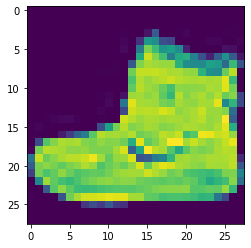

In [48]:
#For deatailed analysis lets plot the data
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [49]:
#Lets build a multiclass classification model
#set random seed
tf.random.set_seed=42
#Create the model
minst_model_1=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
    ]
)
#Complie the model
minst_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
#model fit
minst_model_1.fit(train_data,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3098 - accuracy: 0.1388
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8271 - accuracy: 0.2442
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6845 - accuracy: 0.2882
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6098 - accuracy: 0.3277
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4406 - accuracy: 0.4056
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3584 - accuracy: 0.4243
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3296 - accuracy: 0.4320
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2976 - accuracy: 0.4424
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2831 - accuracy: 0.4443
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2

Two different losses function we can use during multi-label classification:

*   CategoricalCrossentropy : In order to use this the labels should be one hot encoded.
*   SpareCategoricalCrossentopy: This canbe used when the labels are classified as 1,2,3...



In [50]:
#Lets see how we can use categorical Cross entropy the same model
#Compile the model with categorical cross entropy
minst_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"]
                      )
#fit the model.
history_1=minst_model_1.fit(train_data,tf.one_hot(train_labels,depth=10),
                            epochs=10,
                            validation_data=(test_data,tf.one_hot(test_labels,depth=10)))


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2576 - accuracy: 0.4527 - val_loss: 1.2699 - val_accuracy: 0.4535
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2525 - accuracy: 0.4540 - val_loss: 1.2800 - val_accuracy: 0.4544
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2442 - accuracy: 0.4563 - val_loss: 1.2540 - val_accuracy: 0.4605
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2411 - accuracy: 0.4553 - val_loss: 1.2615 - val_accuracy: 0.4603
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2344 - accuracy: 0.4574 - val_loss: 1.2425 - val_accuracy: 0.4626
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2376 - accuracy: 0.4555 - val_loss: 1.2432 - val_accuracy: 0.4661
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2266 - accuracy: 0.4596 - val_loss: 1.2582 - val_accuracy:

Lets do some data preprocessing and see whether its improving model performance 

In [51]:
#normalisation
#check the min and max values of the data
train_data.min(),train_data.max()


(0, 255)

Neural network prefer the data to be scales or normalised. This means that they like to have numbers between 0&1

In [52]:
#We can get our training and testing data betwwen 0 and 1 by dividing the data with the maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [53]:
train_data_norm[0].shape

(28, 28)

In [54]:
#let use the exact same model and use the normalised model
#set random seed
tf.random.set_seed=42
#Create the model
minst_model_2=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax"),
    ]
)
#Complie the model
minst_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])
#Fit_model
history_2=minst_model_2.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4671 - accuracy: 0.4335 - val_loss: 1.1314 - val_accuracy: 0.5697
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0173 - accuracy: 0.5962 - val_loss: 0.9693 - val_accuracy: 0.6262
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8990 - accuracy: 0.6533 - val_loss: 0.8682 - val_accuracy: 0.6824
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7961 - accuracy: 0.7081 - val_loss: 0.7535 - val_accuracy: 0.7316
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7108 - accuracy: 0.7395 - val_loss: 0.7082 - val_accuracy: 0.7498
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6642 - accuracy: 0.7547 - val_loss: 0.6687 - val_accuracy: 0.7563
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6274 - accuracy: 0.7793 - val_loss: 0.6408 - val_accura

Lets the comapre the loss curves of normalised data model and data without normalisation

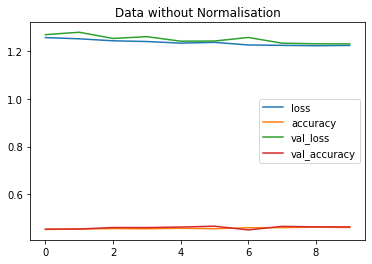

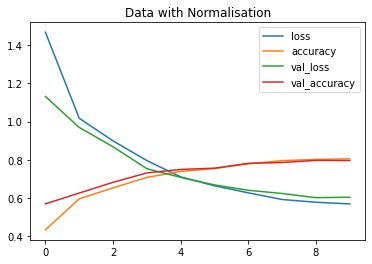

In [55]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Data without Normalisation")
pd.DataFrame(history_2.history).plot(title="Data with Normalisation")

The slight difference in data made big difference performance.
Now lets see how we can find the ideal learning rate

In [56]:
#set random seed
tf.random.set_seed=42
#create the model
minst_model_3=tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
     
    ]
)
#Compile the model
minst_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
#create learning rate scheduler
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/20))
#Fit the model
history_3=minst_model_3.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels),
                           callbacks=(lr_scheduler))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4897 - accuracy: 0.4426 - val_loss: 1.2111 - val_accuracy: 0.5180 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1293 - accuracy: 0.5314 - val_loss: 1.1030 - val_accuracy: 0.5359 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0591 - accuracy: 0.5519 - val_loss: 1.0695 - val_accuracy: 0.5532 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0176 - accuracy: 0.5773 - val_loss: 1.0505 - val_accuracy: 0.5701 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9719 - accuracy: 0.6140 - val_loss: 0.9789 - val_accuracy: 0.6143 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9273 - accuracy: 0.6401 - val_loss: 0.9392 - val_accuracy: 0.6504 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 7s

Text(0, 0.5, 'Validation_Loss')

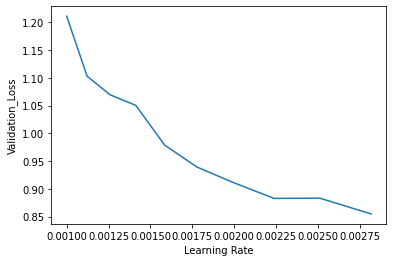

In [57]:
#lets plot learning rate vs validation loss
plt.plot(pd.DataFrame(history_3.history)["lr"],pd.DataFrame(history_3.history)["val_loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Validation_Loss")


We could see that the ideal learning Rate =0.00125


In [58]:
tf.random.set_seed=42
#create the model
minst_model_4=tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
    ]
    )
#Compile the model
minst_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.00125),
                      metrics=["accuracy"])
#Fit the model
history_4= minst_model_4.fit(train_data_norm,
                           train_labels,
                           epochs=20,
                           validation_data=(test_data_norm,test_labels)
                           )

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1338 - accuracy: 0.5674 - val_loss: 0.8193 - val_accuracy: 0.7090
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7562 - accuracy: 0.7293 - val_loss: 0.7693 - val_accuracy: 0.7372
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6946 - accuracy: 0.7594 - val_loss: 0.6910 - val_accuracy: 0.7668
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6565 - accuracy: 0.7753 - val_loss: 0.6722 - val_accuracy: 0.7690
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6329 - accuracy: 0.7841 - val_loss: 0.6420 - val_accuracy: 0.7793
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6160 - accuracy: 0.7871 - val_loss: 0.6422 - val_accuracy: 0.7813
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6047 - accuracy: 0.7904 - val_loss: 0.6339 - val_accuracy:

We improve model by adding more layers.. But for now, lets stop fitting the model and apply more evaluation techniques which we used before

In [59]:
from prompt_toolkit.layout.containers import HorizontalAlign
from pandas.core.dtypes.common import classes
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [60]:
y_probs=minst_model_4.predict(test_data_norm)
#View the predictions
y_probs[0:2]

313/313 [==============================] - 1s 2ms/step


array([[2.3431167e-11, 5.9891484e-14, 1.7237494e-11, 9.6051226e-14,
        3.0684908e-09, 1.7356582e-01, 1.0376454e-08, 1.6308358e-01,
        4.0019394e-04, 6.6295034e-01],
       [7.9496345e-03, 2.6099148e-10, 6.5886062e-01, 5.7535824e-05,
        4.8276052e-02, 4.8777480e-29, 2.8485397e-01, 0.0000000e+00,
        2.1147996e-06, 0.0000000e+00]], dtype=float32)

In [61]:
y_pred=y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

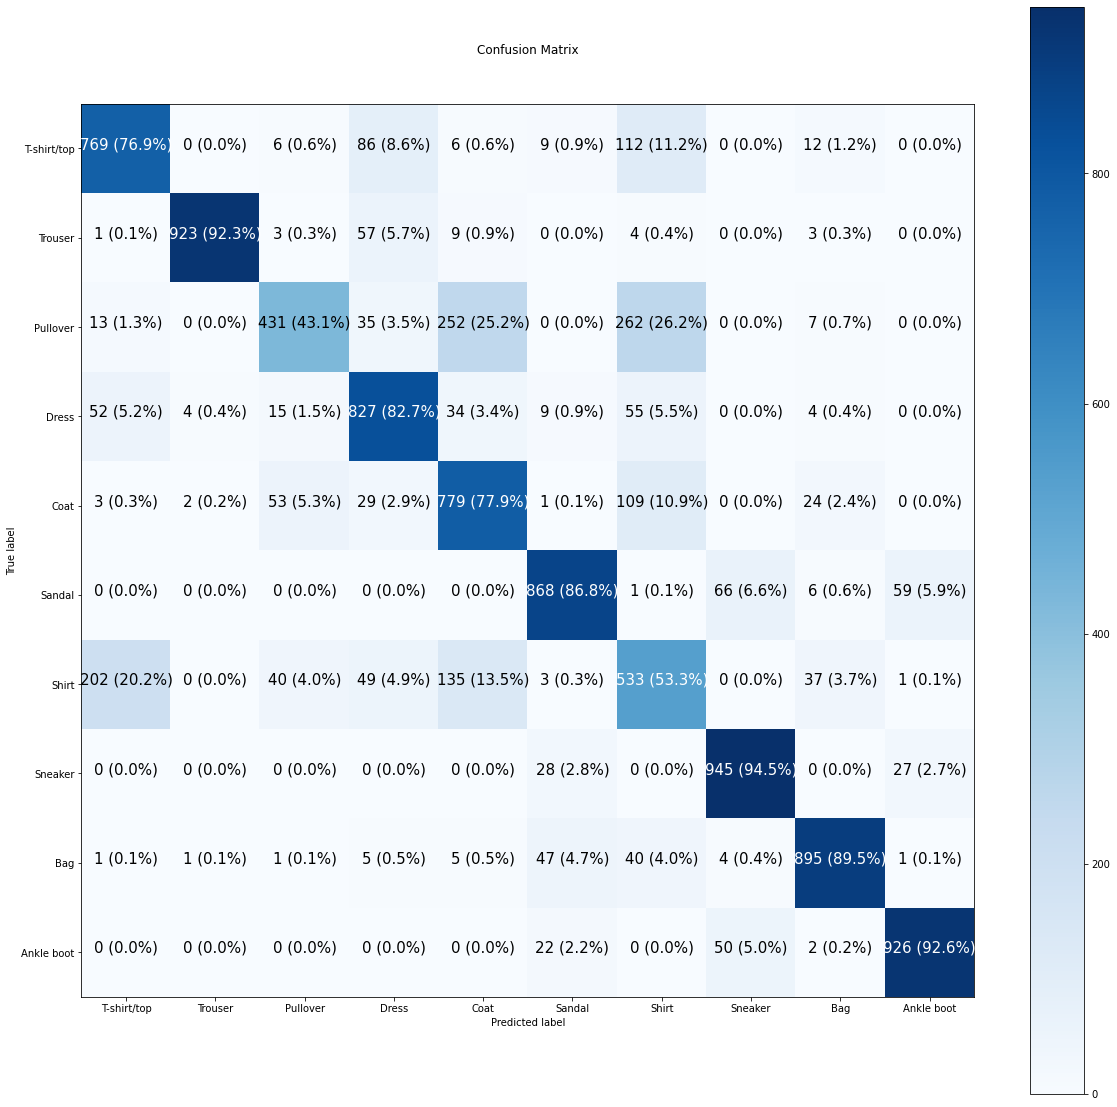

In [62]:
#create the confusion matrix
make_confusion_matrix(test_labels,y_pred,class_names)

We could see that our model is getting confused between T-Shirt, shirt and pullover which is totally fair. Based on this we can make desions for further improving our model.
We can take decision like to combine these classed in to one or get more data for theses classes so that the model learns properly about these.

Now lets see what is happening behind the secene.
For that we can explore the more deatiled architecure for our model.

In [63]:
#Extract one layer from the model
minst_model_4.layers[1]

In [64]:
weigths,biases=minst_model_4.layers[1].get_weights()
weigths,weigths.shape,biases

(array([[-0.89529324, -0.05489121,  1.0700653 , -0.21464711],
        [-0.3756022 ,  0.02902663, -0.7766843 ,  0.47823575],
        [-1.2109647 , -0.06233284,  0.28337672,  1.0710728 ],
        ...,
        [-0.23014909, -0.02246038, -0.20805737,  0.03922826],
        [ 0.33561033, -0.03746448, -0.43991926, -0.04812201],
        [-0.6382697 , -0.02570605,  0.10751189,  1.1820774 ]],
       dtype=float32),
 (784, 4),
 array([ 0.48899898, -0.00954334,  0.15765314,  0.49903852], dtype=float32))

In [65]:
minst_model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 3140      
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


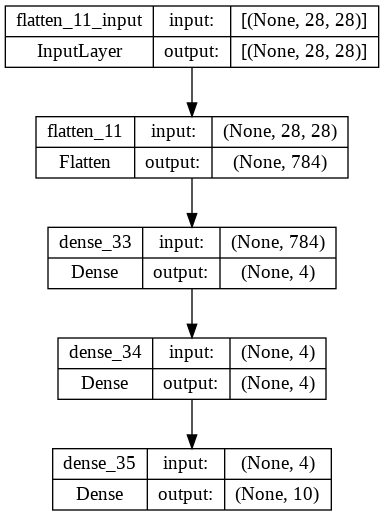

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(minst_model_4,show_shapes=True)